<a href="https://colab.research.google.com/github/ashishmission93/Ashish-Autonomous-Vehicles-and-Drones-Projects/blob/main/PROBLEM_4_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

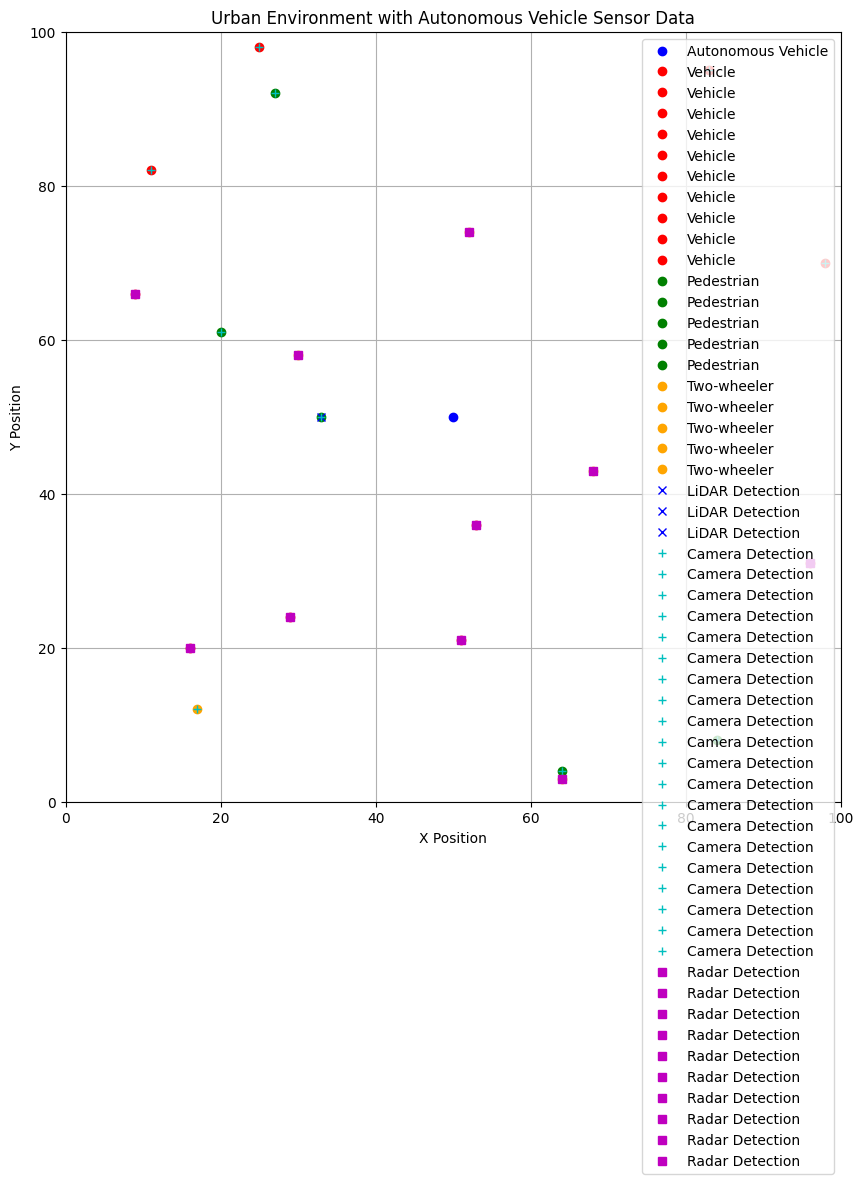

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
RADAR_RANGE = 50  # Range of the simulated radar in units

class AutonomousVehicle:
    """Simulate an autonomous vehicle with sensors in a dense urban environment."""

    def __init__(self, position):
        self.position = np.array(position)
        self.lidar_data = []
        self.camera_data = []
        self.radar_data = []
        self.sensor_range = {
            "lidar": LIDAR_RANGE,
            "radar": RADAR_RANGE
        }

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            if distance <= self.sensor_range["lidar"]:
                self.lidar_data.append({
                    "type": obj["type"],
                    "position": obj["position"],
                    "distance": distance
                })

    def read_camera(self, objects):
        """Simulate a camera scan with a simpler representation for objects in sight."""
        self.camera_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            # Camera has no specific range, logs objects within view
            self.camera_data.append({
                "type": obj["type"],
                "position": obj["position"],
                "distance": distance
            })

    def read_radar(self, objects):
        """Simulate radar to detect moving objects within a larger range."""
        self.radar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            if distance <= self.sensor_range["radar"] and obj["type"] in ["vehicle", "two-wheeler"]:
                self.radar_data.append({
                    "type": obj["type"],
                    "position": obj["position"],
                    "distance": distance
                })

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic elements."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = self.spawn_objects(num_vehicles, "vehicle")
        self.pedestrians = self.spawn_objects(num_pedestrians, "pedestrian")
        self.two_wheelers = self.spawn_objects(num_vehicles // 2, "two-wheeler")  # Simulate two-wheelers

    def spawn_objects(self, num, obj_type):
        """Spawn objects at random positions within the environment."""
        objects = []
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            objects.append({
                "type": obj_type,
                "position": position
            })
        return objects

    def get_all_objects(self):
        """Combine all objects in the environment."""
        return self.vehicles + self.pedestrians + self.two_wheelers

# Initialize the environment and autonomous vehicle
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

# Simulation loop: gather sensor data for each sensor type
objects = environment.get_all_objects()
autonomous_vehicle.read_lidar(objects)
autonomous_vehicle.read_camera(objects)
autonomous_vehicle.read_radar(objects)

# Visualization of environment with sensor data
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(autonomous_vehicle.position[0], autonomous_vehicle.position[1], 'bo', label="Autonomous Vehicle")
for obj in objects:
    color = "gray"
    if obj["type"] == "vehicle":
        color = "red"
    elif obj["type"] == "pedestrian":
        color = "green"
    elif obj["type"] == "two-wheeler":
        color = "orange"
    plt.plot(obj["position"][0], obj["position"][1], 'o', color=color, label=obj["type"].capitalize())

# Mark LiDAR, camera, and radar detected objects differently
for data in autonomous_vehicle.lidar_data:
    plt.plot(data["position"][0], data["position"][1], 'bx', label="LiDAR Detection")
for data in autonomous_vehicle.camera_data:
    plt.plot(data["position"][0], data["position"][1], 'c+', label="Camera Detection")
for data in autonomous_vehicle.radar_data:
    plt.plot(data["position"][0], data["position"][1], 'ms', label="Radar Detection")

plt.title("Urban Environment with Autonomous Vehicle Sensor Data")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.


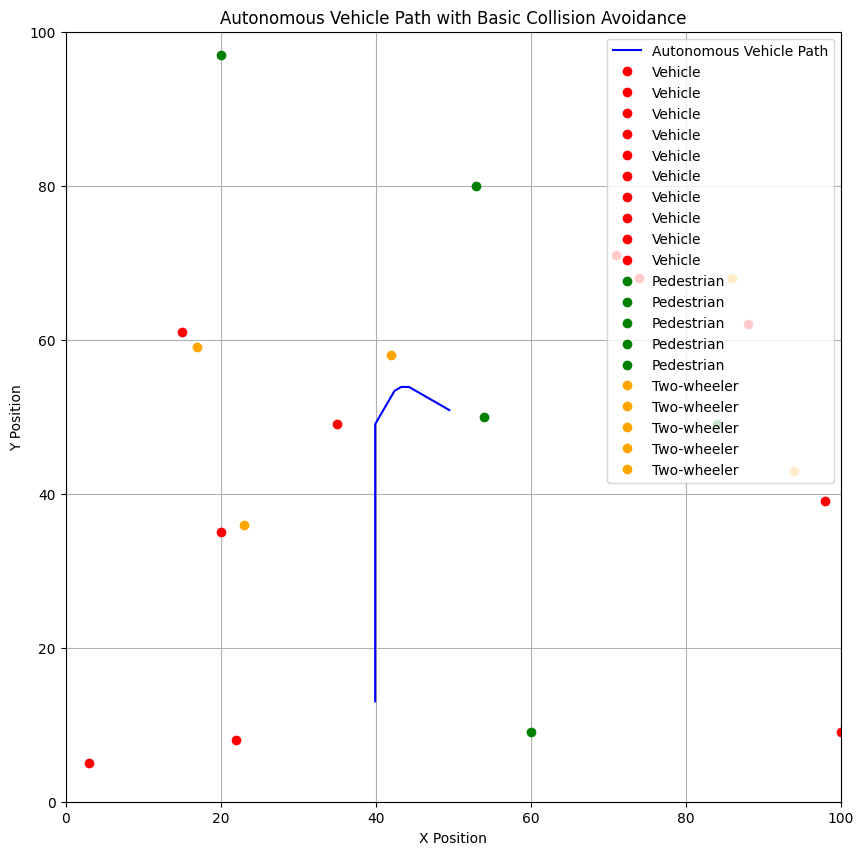

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
RADAR_RANGE = 50  # Range of the simulated radar in units
AV_SPEED = 1.0  # Autonomous vehicle speed
SAFE_DISTANCE = 5.0  # Minimum distance to avoid collisions

class AutonomousVehicle:
    """Simulate an autonomous vehicle with sensors and basic collision avoidance."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.orientation = np.pi / 2  # Initial orientation (facing upwards in y-axis)
        self.speed = AV_SPEED
        self.lidar_data = []
        self.camera_data = []
        self.radar_data = []
        self.sensor_range = {
            "lidar": LIDAR_RANGE,
            "radar": RADAR_RANGE
        }

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            if distance <= self.sensor_range["lidar"]:
                self.lidar_data.append({
                    "type": obj["type"],
                    "position": obj["position"],
                    "distance": distance
                })

    def move_forward(self):
        """Move the autonomous vehicle forward in the current direction."""
        movement = np.array([np.cos(self.orientation), np.sin(self.orientation)]) * self.speed
        self.position += movement

    def avoid_collision(self):
        """Adjust direction if an obstacle is within the safe distance."""
        for data in self.lidar_data:
            if data["distance"] < SAFE_DISTANCE:
                # If obstacle detected, adjust orientation slightly
                self.orientation += np.pi / 6  # Turn by 30 degrees
                print(f"Avoiding collision: adjusting direction by 30 degrees.")
                return

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic elements."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = self.spawn_objects(num_vehicles, "vehicle")
        self.pedestrians = self.spawn_objects(num_pedestrians, "pedestrian")
        self.two_wheelers = self.spawn_objects(num_vehicles // 2, "two-wheeler")  # Simulate two-wheelers

    def spawn_objects(self, num, obj_type):
        """Spawn objects at random positions within the environment."""
        objects = []
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            objects.append({
                "type": obj_type,
                "position": position
            })
        return objects

    def get_all_objects(self):
        """Combine all objects in the environment."""
        return self.vehicles + self.pedestrians + self.two_wheelers

# Initialize the environment and autonomous vehicle
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

# Simulation loop for movement and collision avoidance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

for _ in range(num_steps):
    objects = environment.get_all_objects()

    # Sensor data updates
    autonomous_vehicle.read_lidar(objects)

    # Collision avoidance logic
    autonomous_vehicle.avoid_collision()

    # Move forward after adjusting for obstacles
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of autonomous vehicle's path with collision avoidance
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot objects in the environment
for obj in environment.get_all_objects():
    color = "gray"
    if obj["type"] == "vehicle":
        color = "red"
    elif obj["type"] == "pedestrian":
        color = "green"
    elif obj["type"] == "two-wheeler":
        color = "orange"
    plt.plot(obj["position"][0], obj["position"][1], 'o', color=color, label=obj["type"].capitalize())

plt.title("Autonomous Vehicle Path with Basic Collision Avoidance")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.
Avoiding collision: adjusting direction by 30 degrees.


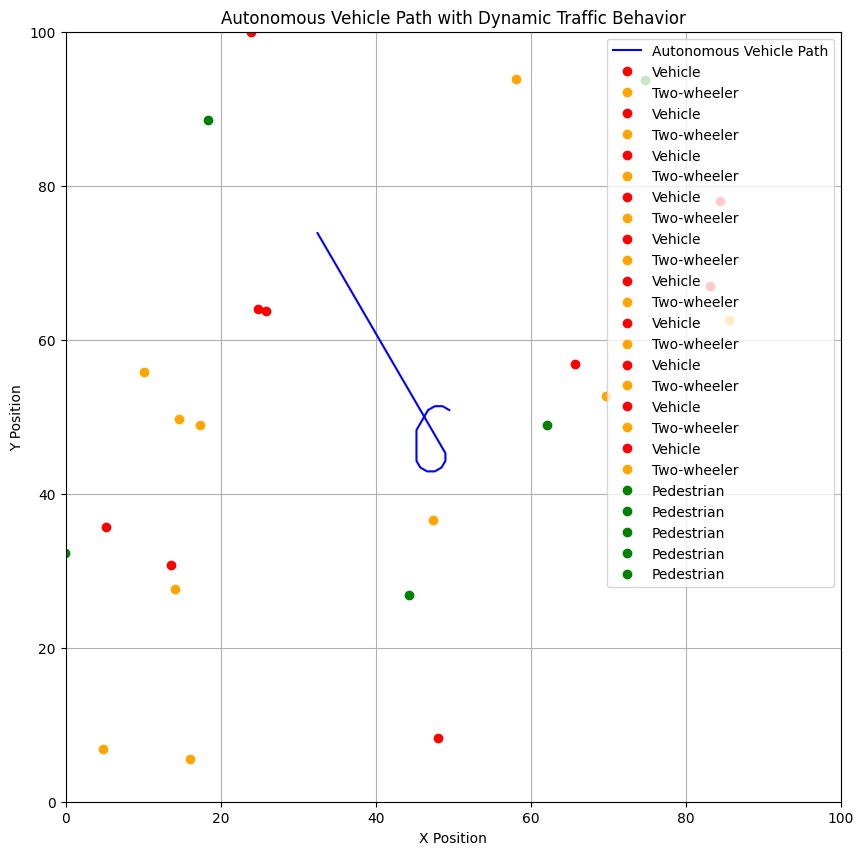

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
RADAR_RANGE = 50  # Range of the simulated radar in units
AV_SPEED = 1.0  # Autonomous vehicle speed
SAFE_DISTANCE = 5.0  # Minimum distance to avoid collisions

class AutonomousVehicle:
    """Simulate an autonomous vehicle with sensors and basic collision avoidance."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.orientation = np.pi / 2  # Initial orientation (facing upwards in y-axis)
        self.speed = AV_SPEED
        self.lidar_data = []
        self.sensor_range = {
            "lidar": LIDAR_RANGE,
            "radar": RADAR_RANGE
        }

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            if distance <= self.sensor_range["lidar"]:
                self.lidar_data.append({
                    "type": obj["type"],
                    "position": obj["position"],
                    "distance": distance
                })

    def move_forward(self):
        """Move the autonomous vehicle forward in the current direction."""
        movement = np.array([np.cos(self.orientation), np.sin(self.orientation)]) * self.speed
        self.position += movement

    def avoid_collision(self):
        """Adjust direction if an obstacle is within the safe distance."""
        for data in self.lidar_data:
            if data["distance"] < SAFE_DISTANCE:
                # If obstacle detected, adjust orientation slightly
                self.orientation += np.pi / 6  # Turn by 30 degrees
                print("Avoiding collision: adjusting direction by 30 degrees.")
                return

class TrafficEntity:
    """Simulate a moving entity in traffic (vehicle, two-wheeler, pedestrian)."""

    def __init__(self, position, entity_type):
        self.position = np.array(position, dtype=float)
        self.entity_type = entity_type
        self.speed = self.set_speed()

    def set_speed(self):
        """Set speed based on entity type."""
        if self.entity_type == "vehicle":
            return uniform(0.5, 1.5)
        elif self.entity_type == "two-wheeler":
            return uniform(0.7, 1.2)
        elif self.entity_type == "pedestrian":
            return uniform(0.2, 0.6)

    def move_randomly(self):
        """Move in a random direction to simulate chaotic traffic behavior."""
        angle = uniform(0, 2 * np.pi)  # Random angle for direction
        movement = np.array([np.cos(angle), np.sin(angle)]) * self.speed
        self.position += movement

class UrbanEnvironment:
    """Simulate a basic urban environment with dynamic traffic elements."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.entities = []
        self.spawn_traffic(num_vehicles, num_pedestrians)

    def spawn_traffic(self, num_vehicles, num_pedestrians):
        """Spawn vehicles, two-wheelers, and pedestrians with random positions."""
        for _ in range(num_vehicles):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "vehicle")
            self.entities.append(entity)

            # Add two-wheeler in the environment
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "two-wheeler")
            self.entities.append(entity)

        for _ in range(num_pedestrians):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "pedestrian")
            self.entities.append(entity)

    def move_entities(self):
        """Move all traffic entities in a random manner."""
        for entity in self.entities:
            entity.move_randomly()

    def get_all_objects(self):
        """Return positions and types of all entities."""
        return [{"type": entity.entity_type, "position": entity.position} for entity in self.entities]

# Initialize the environment and autonomous vehicle
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

# Simulation loop for movement, collision avoidance, and traffic behavior
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

for _ in range(num_steps):
    # Move all traffic entities to simulate dynamic behavior
    environment.move_entities()

    # Get updated object positions
    objects = environment.get_all_objects()

    # Sensor data updates
    autonomous_vehicle.read_lidar(objects)

    # Collision avoidance logic
    autonomous_vehicle.avoid_collision()

    # Move forward after adjusting for obstacles
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of autonomous vehicle's path with dynamic traffic behavior
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot dynamic traffic entities in the environment
for entity in environment.entities:
    color = "gray"
    if entity.entity_type == "vehicle":
        color = "red"
    elif entity.entity_type == "pedestrian":
        color = "green"
    elif entity.entity_type == "two-wheeler":
        color = "orange"
    plt.plot(entity.position[0], entity.position[1], 'o', color=color, label=entity.entity_type.capitalize())

plt.title("Autonomous Vehicle Path with Dynamic Traffic Behavior")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


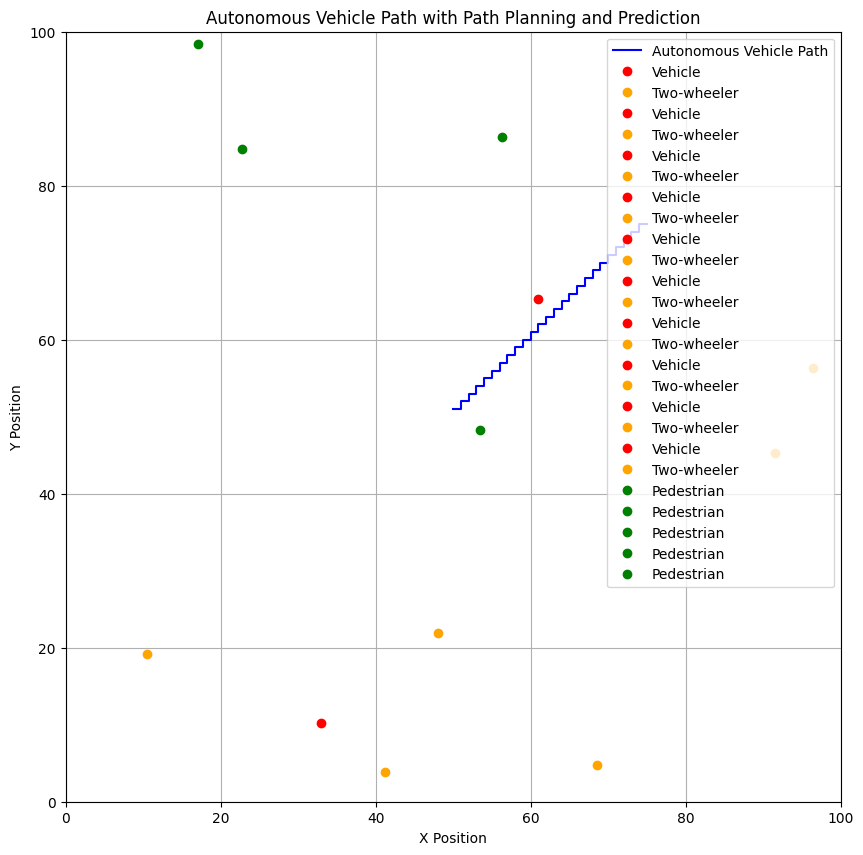

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform
import heapq  # For priority queue in A* algorithm

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
RADAR_RANGE = 50  # Range of the simulated radar in units
AV_SPEED = 1.0  # Autonomous vehicle speed
SAFE_DISTANCE = 5.0  # Minimum distance to avoid collisions

class AutonomousVehicle:
    """Simulate an autonomous vehicle with sensors and basic collision avoidance."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.orientation = np.pi / 2  # Initial orientation (facing upwards in y-axis)
        self.speed = AV_SPEED
        self.lidar_data = []
        self.sensor_range = {
            "lidar": LIDAR_RANGE,
            "radar": RADAR_RANGE
        }

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            if distance <= self.sensor_range["lidar"]:
                self.lidar_data.append({
                    "type": obj["type"],
                    "position": obj["position"],
                    "distance": distance
                })

    def move_forward(self):
        """Move the autonomous vehicle forward in the current direction."""
        movement = np.array([np.cos(self.orientation), np.sin(self.orientation)]) * self.speed
        self.position += movement

    def avoid_collision(self):
        """Adjust direction if an obstacle is within the safe distance."""
        for data in self.lidar_data:
            if data["distance"] < SAFE_DISTANCE:
                # If obstacle detected, adjust orientation slightly
                self.orientation += np.pi / 6  # Turn by 30 degrees
                print("Avoiding collision: adjusting direction by 30 degrees.")
                return

    def predict_path(self, target, obstacles):
        """Use A* algorithm to plan path to target while avoiding predicted obstacles."""
        planner = PathPlanner(ENV_SIZE)
        return planner.a_star(self.position, target, obstacles)

class TrafficEntity:
    """Simulate a moving entity in traffic (vehicle, two-wheeler, pedestrian)."""

    def __init__(self, position, entity_type):
        self.position = np.array(position, dtype=float)
        self.entity_type = entity_type
        self.speed = self.set_speed()
        self.direction = uniform(0, 2 * np.pi)  # Random initial direction

    def set_speed(self):
        """Set speed based on entity type."""
        if self.entity_type == "vehicle":
            return uniform(0.5, 1.5)
        elif self.entity_type == "two-wheeler":
            return uniform(0.7, 1.2)
        elif self.entity_type == "pedestrian":
            return uniform(0.2, 0.6)

    def move_randomly(self):
        """Move in a random direction to simulate chaotic traffic behavior."""
        angle_change = uniform(-np.pi / 8, np.pi / 8)  # Slight random angle change
        self.direction += angle_change
        movement = np.array([np.cos(self.direction), np.sin(self.direction)]) * self.speed
        self.position += movement

    def predict_position(self, steps=1):
        """Predict future position based on current direction and speed."""
        future_position = self.position + np.array([np.cos(self.direction), np.sin(self.direction)]) * self.speed * steps
        return future_position

class PathPlanner:
    """A* Path Planning for Autonomous Vehicle with dynamic obstacle prediction."""

    def __init__(self, grid_size):
        self.grid_size = grid_size

    def a_star(self, start, goal, predicted_obstacles):
        """A* algorithm to find a path from start to goal, avoiding predicted obstacles."""
        open_set = []
        heapq.heappush(open_set, (0, tuple(start)))
        came_from = {}
        g_score = {tuple(start): 0}
        f_score = {tuple(start): self.heuristic(start, goal)}

        while open_set:
            _, current = heapq.heappop(open_set)
            current = tuple(current)

            if np.linalg.norm(np.array(current) - np.array(goal)) < 2:  # Close enough to goal
                return self.reconstruct_path(came_from, current)

            for neighbor in self.get_neighbors(current):
                if neighbor in predicted_obstacles:
                    continue

                tentative_g_score = g_score[current] + 1

                if tentative_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    if neighbor not in [i[1] for i in open_set]:
                        heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return []  # No path found

    def heuristic(self, a, b):
        """Heuristic function for A* (Euclidean distance)."""
        return np.linalg.norm(np.array(a) - np.array(b))

    def get_neighbors(self, position):
        """Get valid neighbors for a grid position."""
        x, y = position
        neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        return [(nx, ny) for nx, ny in neighbors if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size]

    def reconstruct_path(self, came_from, current):
        """Reconstruct path from A* search."""
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        path.reverse()
        return path

class UrbanEnvironment:
    """Simulate a basic urban environment with dynamic traffic elements."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.entities = []
        self.spawn_traffic(num_vehicles, num_pedestrians)

    def spawn_traffic(self, num_vehicles, num_pedestrians):
        """Spawn vehicles, two-wheelers, and pedestrians with random positions."""
        for _ in range(num_vehicles):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "vehicle")
            self.entities.append(entity)

            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "two-wheeler")
            self.entities.append(entity)

        for _ in range(num_pedestrians):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "pedestrian")
            self.entities.append(entity)

    def move_entities(self):
        """Move all traffic entities in a random manner."""
        for entity in self.entities:
            entity.move_randomly()

    def predict_obstacle_positions(self, steps=3):
        """Predict future positions of all entities."""
        predicted_positions = set()
        for entity in self.entities:
            future_position = tuple(map(int, entity.predict_position(steps)))
            predicted_positions.add(future_position)
        return predicted_positions

    def get_all_objects(self):
        """Return positions and types of all entities."""
        return [{"type": entity.entity_type, "position": entity.position} for entity in self.entities]

# Initialize the environment and autonomous vehicle
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))
target_position = (ENV_SIZE - 10, ENV_SIZE - 10)

# Simulation loop for movement, collision avoidance, and path prediction
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

for _ in range(num_steps):
    # Move all traffic entities to simulate dynamic behavior
    environment.move_entities()

    # Get updated object positions
    objects = environment.get_all_objects()
    autonomous_vehicle.read_lidar(objects)

    # Predict future positions of nearby objects
    predicted_obstacles = environment.predict_obstacle_positions(steps=3)

    # Path planning with prediction
    path = autonomous_vehicle.predict_path(target_position, predicted_obstacles)
    if path:
        next_position = path[1]  # Move to the next position on the path
        autonomous_vehicle.position = np.array(next_position)

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of autonomous vehicle's path with path planning and prediction
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot dynamic traffic entities in the environment
for entity in environment.entities:
    color = "gray"
    if entity.entity_type == "vehicle":
        color = "red"
    elif entity.entity_type == "pedestrian":
        color = "green"
    elif entity.entity_type == "two-wheeler":
        color = "orange"
    plt.plot(entity.position[0], entity.position[1], 'o', color=color, label=entity.entity_type.capitalize())

plt.title("Autonomous Vehicle Path with Path Planning and Prediction")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Deciding to slow down due to nearby object.
Deciding to slow down due to nearby object.
Deciding to slow down due to nearby object.
Deciding to change direction due to proximity.
Deciding to change direction due to proximity.
Deciding to change direction due to proximity.
Deciding to change direction due to proximity.
Deciding to change direction due to proximity.
Deciding to change direction due to proximity.
Deciding to change direction due to proximity.


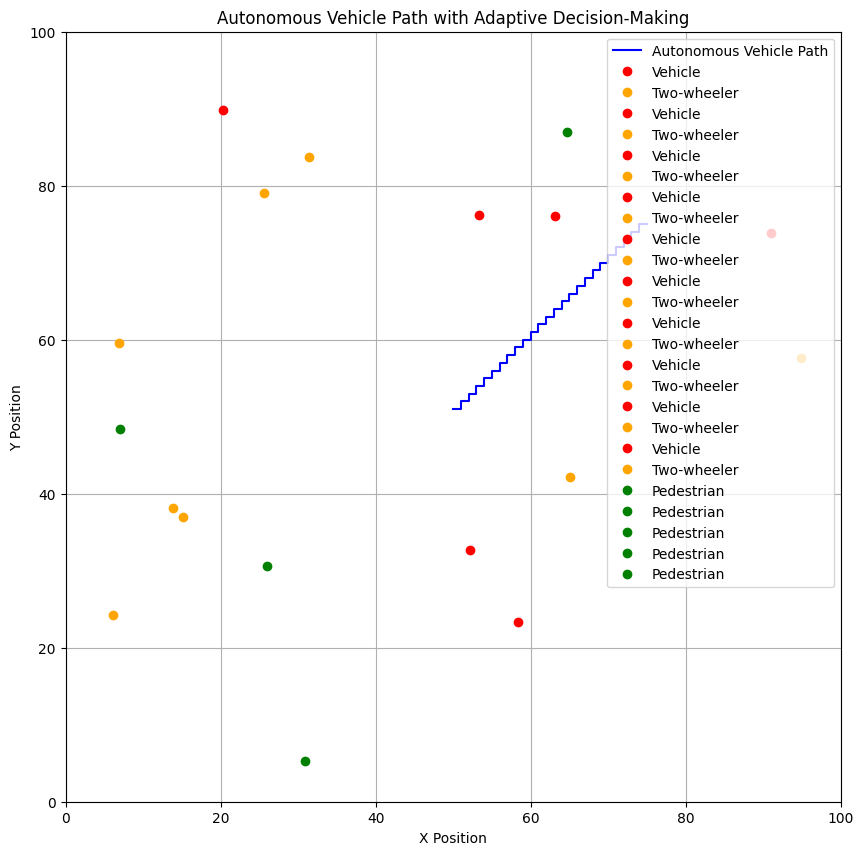

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform
import heapq  # For priority queue in A* algorithm

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
RADAR_RANGE = 50  # Range of the simulated radar in units
AV_SPEED = 1.0  # Autonomous vehicle speed
SAFE_DISTANCE = 5.0  # Minimum distance to avoid collisions

class AutonomousVehicle:
    """Simulate an autonomous vehicle with sensors and basic collision avoidance."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.orientation = np.pi / 2  # Initial orientation (facing upwards in y-axis)
        self.speed = AV_SPEED
        self.lidar_data = []
        self.sensor_range = {
            "lidar": LIDAR_RANGE,
            "radar": RADAR_RANGE
        }

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj["position"])
            if distance <= self.sensor_range["lidar"]:
                self.lidar_data.append({
                    "type": obj["type"],
                    "position": obj["position"],
                    "distance": distance
                })

    def move_forward(self):
        """Move the autonomous vehicle forward in the current direction."""
        movement = np.array([np.cos(self.orientation), np.sin(self.orientation)]) * self.speed
        self.position += movement

    def avoid_collision(self):
        """Adjust direction if an obstacle is within the safe distance."""
        for data in self.lidar_data:
            if data["distance"] < SAFE_DISTANCE:
                # If obstacle detected, adjust orientation slightly
                self.orientation += np.pi / 6  # Turn by 30 degrees
                print("Avoiding collision: adjusting direction by 30 degrees.")
                return

    def predict_path(self, target, obstacles):
        """Use A* algorithm to plan path to target while avoiding predicted obstacles."""
        planner = PathPlanner(ENV_SIZE)
        return planner.a_star(self.position, target, obstacles)

    def make_decision(self):
        """Make a decision based on current lidar data and entity behaviors."""
        for data in self.lidar_data:
            if data["distance"] < SAFE_DISTANCE:
                # If an object is too close, decide to slow down or change direction
                if self.speed > 0.5:  # Slow down if speed is above a threshold
                    self.speed -= 0.2
                    print("Deciding to slow down due to nearby object.")
                else:
                    self.orientation += np.pi / 6  # Turn if already slow
                    print("Deciding to change direction due to proximity.")

class TrafficEntity:
    """Simulate a moving entity in traffic (vehicle, two-wheeler, pedestrian)."""

    def __init__(self, position, entity_type):
        self.position = np.array(position, dtype=float)
        self.entity_type = entity_type
        self.speed = self.set_speed()
        self.direction = uniform(0, 2 * np.pi)  # Random initial direction

    def set_speed(self):
        """Set speed based on entity type."""
        if self.entity_type == "vehicle":
            return uniform(0.5, 1.5)
        elif self.entity_type == "two-wheeler":
            return uniform(0.7, 1.2)
        elif self.entity_type == "pedestrian":
            return uniform(0.2, 0.6)

    def move_randomly(self):
        """Move in a random direction to simulate chaotic traffic behavior."""
        angle_change = uniform(-np.pi / 8, np.pi / 8)  # Slight random angle change
        self.direction += angle_change
        movement = np.array([np.cos(self.direction), np.sin(self.direction)]) * self.speed
        self.position += movement

    def predict_position(self, steps=1):
        """Predict future position based on current direction and speed."""
        future_position = self.position + np.array([np.cos(self.direction), np.sin(self.direction)]) * self.speed * steps
        return future_position

class PathPlanner:
    """A* Path Planning for Autonomous Vehicle with dynamic obstacle prediction."""

    def __init__(self, grid_size):
        self.grid_size = grid_size

    def a_star(self, start, goal, predicted_obstacles):
        """A* algorithm to find a path from start to goal, avoiding predicted obstacles."""
        open_set = []
        heapq.heappush(open_set, (0, tuple(start)))
        came_from = {}
        g_score = {tuple(start): 0}
        f_score = {tuple(start): self.heuristic(start, goal)}

        while open_set:
            _, current = heapq.heappop(open_set)
            current = tuple(current)

            if np.linalg.norm(np.array(current) - np.array(goal)) < 2:  # Close enough to goal
                return self.reconstruct_path(came_from, current)

            for neighbor in self.get_neighbors(current):
                if neighbor in predicted_obstacles:
                    continue

                tentative_g_score = g_score[current] + 1

                if tentative_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    if neighbor not in [i[1] for i in open_set]:
                        heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return []  # No path found

    def heuristic(self, a, b):
        """Heuristic function for A* (Euclidean distance)."""
        return np.linalg.norm(np.array(a) - np.array(b))

    def get_neighbors(self, position):
        """Get valid neighbors for a grid position."""
        x, y = position
        neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        return [(nx, ny) for nx, ny in neighbors if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size]

    def reconstruct_path(self, came_from, current):
        """Reconstruct path from A* search."""
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        path.reverse()
        return path

class UrbanEnvironment:
    """Simulate a basic urban environment with dynamic traffic elements."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.entities = []
        self.spawn_traffic(num_vehicles, num_pedestrians)

    def spawn_traffic(self, num_vehicles, num_pedestrians):
        """Spawn vehicles, two-wheelers, and pedestrians with random positions."""
        for _ in range(num_vehicles):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "vehicle")
            self.entities.append(entity)

            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "two-wheeler")
            self.entities.append(entity)

        for _ in range(num_pedestrians):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            entity = TrafficEntity(position, "pedestrian")
            self.entities.append(entity)

    def move_entities(self):
        """Move all traffic entities in a random manner."""
        for entity in self.entities:
            entity.move_randomly()

    def predict_obstacle_positions(self, steps=3):
        """Predict future positions of all entities."""
        predicted_positions = set()
        for entity in self.entities:
            future_position = tuple(map(int, entity.predict_position(steps)))
            predicted_positions.add(future_position)
        return predicted_positions

    def get_all_objects(self):
        """Return positions and types of all entities."""
        return [{"type": entity.entity_type, "position": entity.position} for entity in self.entities]

# Initialize the environment and autonomous vehicle
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))
target_position = (ENV_SIZE - 10, ENV_SIZE - 10)

# Simulation loop for movement, collision avoidance, and path prediction
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

for _ in range(num_steps):
    # Move all traffic entities to simulate dynamic behavior
    environment.move_entities()

    # Get updated object positions
    objects = environment.get_all_objects()
    autonomous_vehicle.read_lidar(objects)

    # Predict future positions of nearby objects
    predicted_obstacles = environment.predict_obstacle_positions(steps=3)

    # Decision making based on the current environment
    autonomous_vehicle.make_decision()

    # Path planning with prediction
    path = autonomous_vehicle.predict_path(target_position, predicted_obstacles)
    if path:
        next_position = path[1]  # Move to the next position on the path
        autonomous_vehicle.position = np.array(next_position)

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of autonomous vehicle's path with path planning and prediction
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot dynamic traffic entities in the environment
for entity in environment.entities:
    color = "gray"
    if entity.entity_type == "vehicle":
        color = "red"
    elif entity.entity_type == "pedestrian":
        color = "green"
    elif entity.entity_type == "two-wheeler":
        color = "orange"
    plt.plot(entity.position[0], entity.position[1], 'o', color=color, label=entity.entity_type.capitalize())

plt.title("Autonomous Vehicle Path with Adaptive Decision-Making")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()
